# Data Cleaning, Tranformation and Visualization
Dataset used was the Titanic Dataset available in the seaborn library. The goal is to demonstrate the importance and challenges associated with data preprocessing and visualization.
This lab forms part of the Trestle Academy Ghana AI/ML internship.

# Load Data

In [1]:
# import libraries and load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

# Examine, Preprocess and Transform data

In [2]:
# get general info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# drop unneeded columns
drop_cols = ['adult_male', 'deck', 'who', 'embark_town', 'class', 'alive']
df = df.drop(drop_cols, axis=1)

# view new info on dataset
print('After dropping columns\n')
df.info()

After dropping columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [4]:
# check for null values
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64

In [5]:
# Interpolate missing values in Age
df['age'] = df['age'].interpolate()

# view data after interpolating
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True
887,1,1,female,19.0,0,0,30.0000,S,True
888,0,3,female,22.5,1,2,23.4500,S,False
889,1,1,male,26.0,0,0,30.0000,C,True


In [7]:
# check quantitative aspects of dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Add Family_Size column
df['Family_Size'] = df['sibsp'] + df['parch']
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,False,1
1,1,1,female,38.0,1,0,71.2833,C,False,1
2,1,3,female,26.0,0,0,7.9250,S,True,0
3,1,1,female,35.0,1,0,53.1000,S,False,1
4,0,3,male,35.0,0,0,8.0500,S,True,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True,0
887,1,1,female,19.0,0,0,30.0000,S,True,0
888,0,3,female,22.5,1,2,23.4500,S,False,3
889,1,1,male,26.0,0,0,30.0000,C,True,0


# Visualization

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,False,1
1,1,1,female,38.0,1,0,71.2833,C,False,1
2,1,3,female,26.0,0,0,7.9250,S,True,0
3,1,1,female,35.0,1,0,53.1000,S,False,1
4,0,3,male,35.0,0,0,8.0500,S,True,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True,0
887,1,1,female,19.0,0,0,30.0000,S,True,0
888,0,3,female,22.5,1,2,23.4500,S,False,3
889,1,1,male,26.0,0,0,30.0000,C,True,0


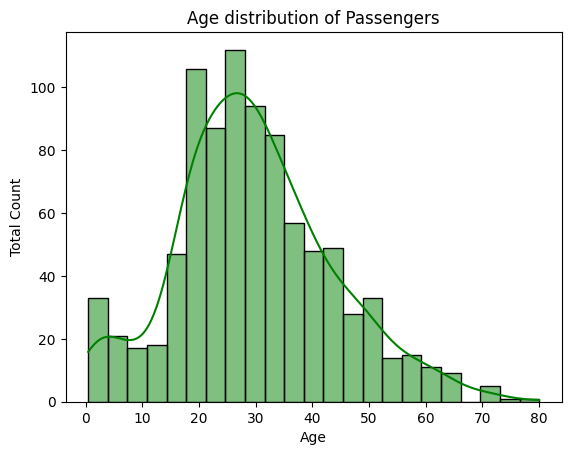

In [10]:
# Overall age distribution
ax = sns.histplot(data = df, x = 'age', kde=True, color='g')
plt.title('Age distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Total Count')
plt.show()

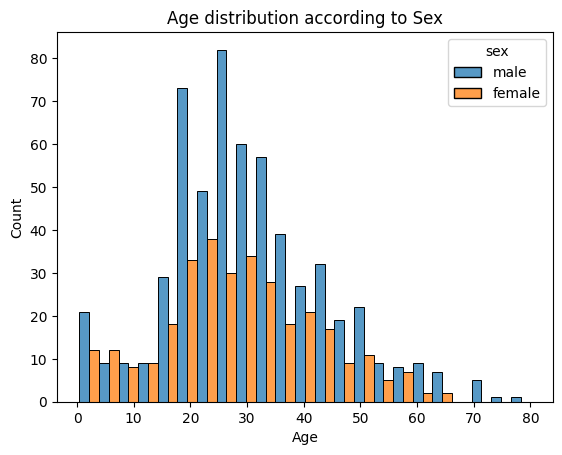

In [11]:
# Gender-Age distribution of passengers
sns.histplot(data = df, x = 'age', hue = 'sex', multiple='dodge')
plt.title('Age distribution according to Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

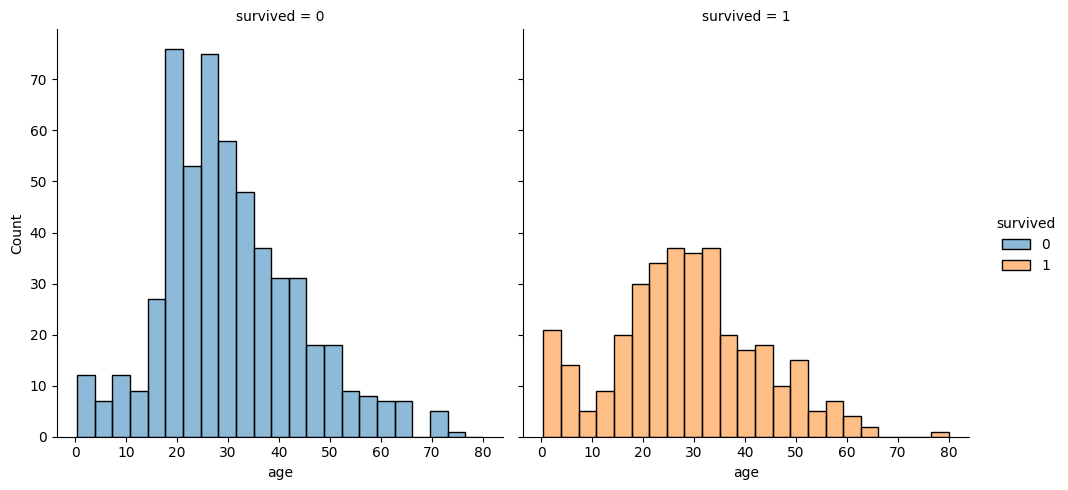

In [12]:
# Age distribution of survivors
sns.displot(data=df, x = 'age', hue = 'survived', col = 'survived')
# survived = 1  did not survive = 0

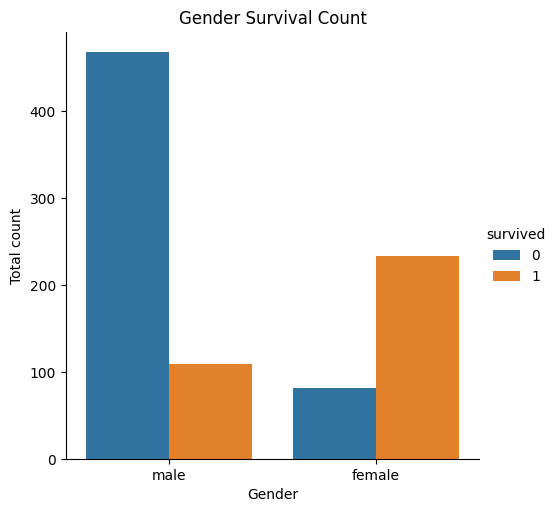

In [13]:
# survival rate based on gender
sns.catplot(data=df, x = 'sex', kind = 'count', hue = 'survived')
plt.title('Gender Survival Count')
plt.xlabel('Gender')
plt.ylabel('Total count')
plt.show()


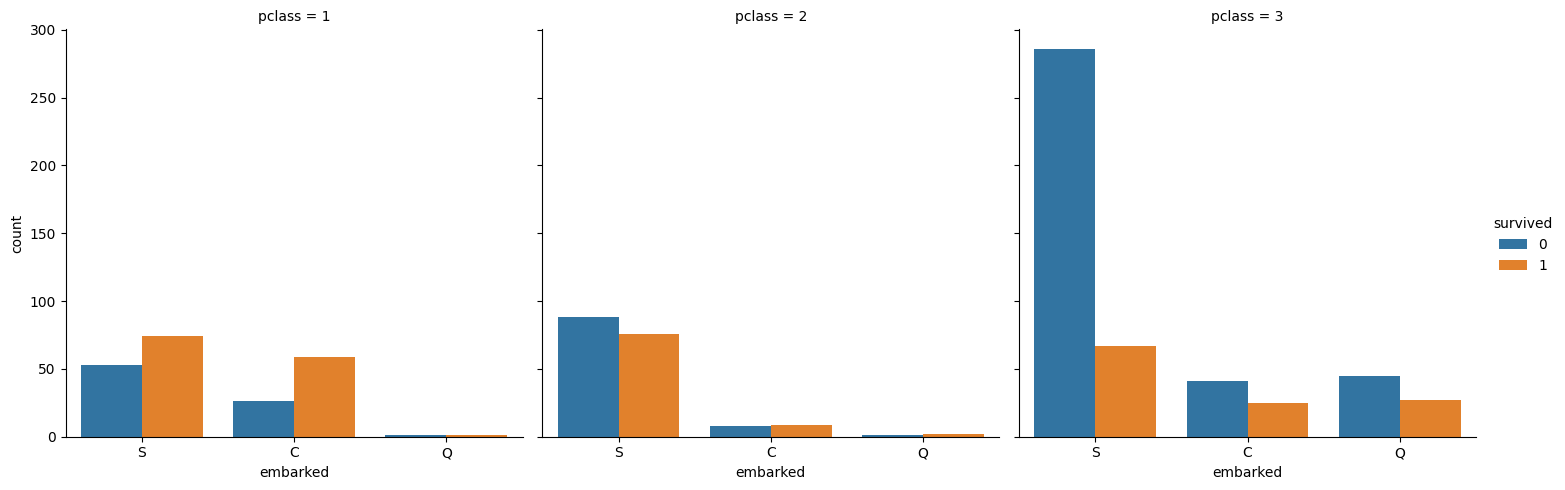

In [14]:
# survival rates based on passenger class
sns.catplot(data = df, x = 'embarked', kind = 'count', hue = 'survived',
            col = 'pclass')
plt.show()
# Embarked column key:
# C = Cherbough
# Q = Queenstown
# S = Southampton

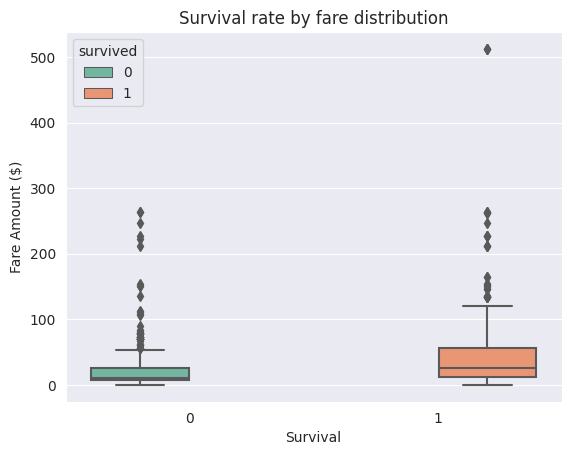

In [15]:
# boxplot of fares against survival
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.boxplot(data=df, x='survived', y='fare', hue='survived')
plt.title('Survival rate by fare distribution')
plt.xlabel('Survival')
plt.ylabel('Fare Amount ($)')
plt.show()

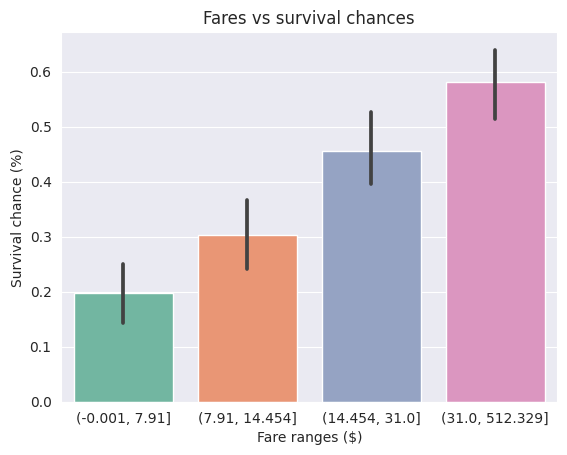

In [16]:
# barplot to show fare range distribution and survival chances

# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['fare'], 4)

sns.barplot(x ='Fare_Range', y ='survived', data = df)
plt.title('Fares vs survival chances')
plt.xlabel('Fare ranges ($)')
plt.ylabel('Survival chance (%)')
plt.show()

In [17]:
# heatmap
#sns.heatmap(df[['pclass', 'survived']], square=True)
#plt.show()
######### will return to this soon!!!!

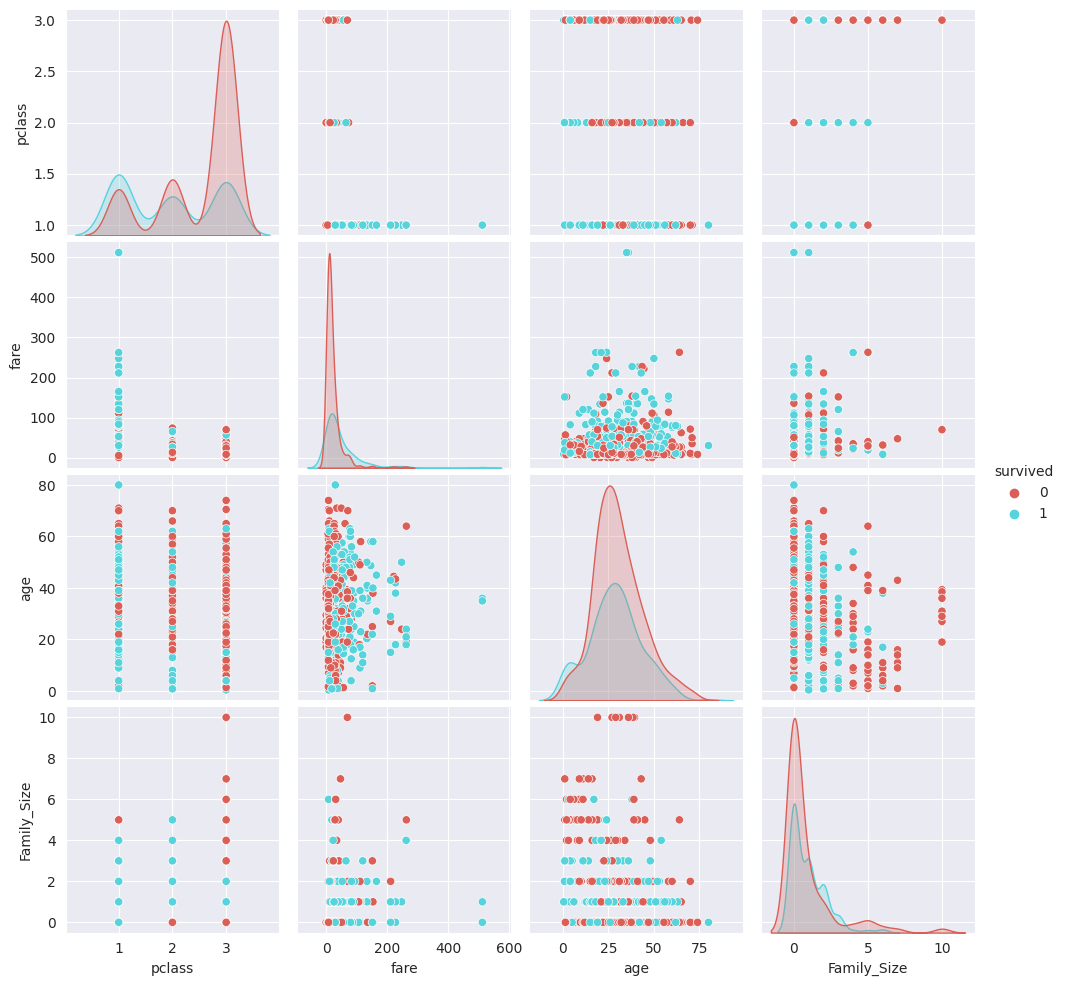

In [18]:
# pairplot
sns.pairplot(df, hue='survived', vars=['pclass', 'fare', 'age','Family_Size'],
             palette='hls')
plt.show()